In [4]:
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Saving
import joblib


In [5]:
# Load the dataset
df = pd.read_csv("/content/movie_metadata.csv")

# Preview first few rows
df.head(3)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [6]:
# Data structure and types
df.info()

# Summary statistics
df.describe()

# Null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [7]:
# Keep relevant columns
df = df[['imdb_score', 'duration', 'genres', 'actor_1_name', 'actor_2_name', 'actor_3_name',
         'director_name', 'plot_keywords', 'budget']]

# Drop missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Confirm cleanup
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_score     4416 non-null   float64
 1   duration       4416 non-null   float64
 2   genres         4416 non-null   object 
 3   actor_1_name   4416 non-null   object 
 4   actor_2_name   4416 non-null   object 
 5   actor_3_name   4416 non-null   object 
 6   director_name  4416 non-null   object 
 7   plot_keywords  4416 non-null   object 
 8   budget         4416 non-null   float64
dtypes: float64(3), object(6)
memory usage: 310.6+ KB


/tmp/ipython-input-7-697084666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df['actor_1_name'] = df['actor_1_name'].fillna("Unknown")
df['actor_2_name'] = df['actor_2_name'].fillna("Unknown")
df['actor_3_name'] = df['actor_3_name'].fillna("Unknown")
df['director_name'] = df['director_name'].fillna("Unknown")


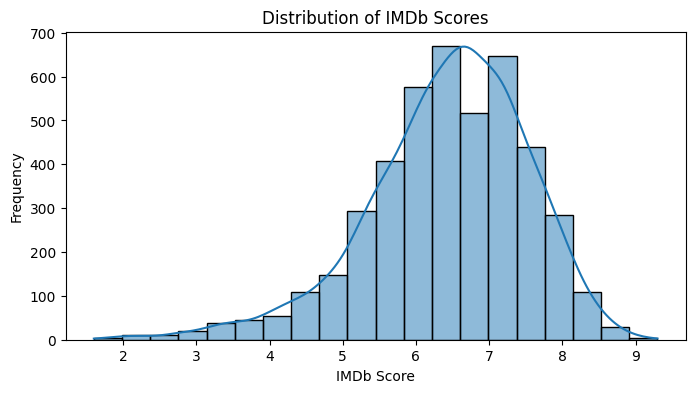

In [9]:
# IMDb Score distribution
plt.figure(figsize=(8,4))
sns.histplot(df['imdb_score'], kde=True, bins=20)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()


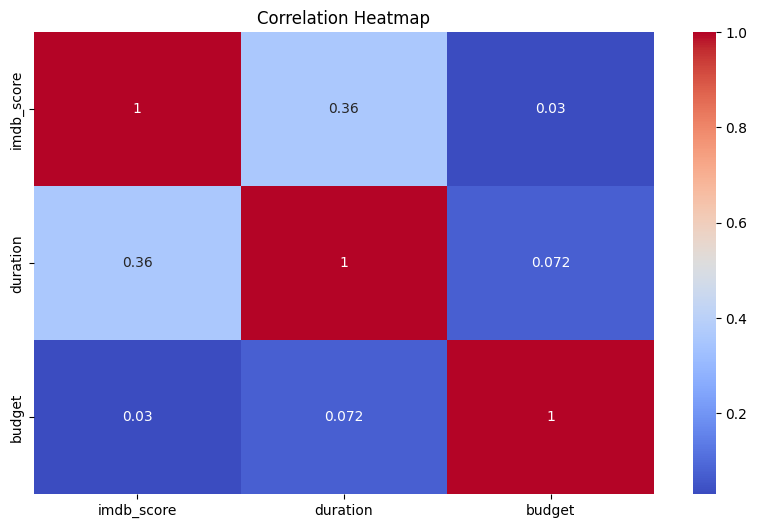

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


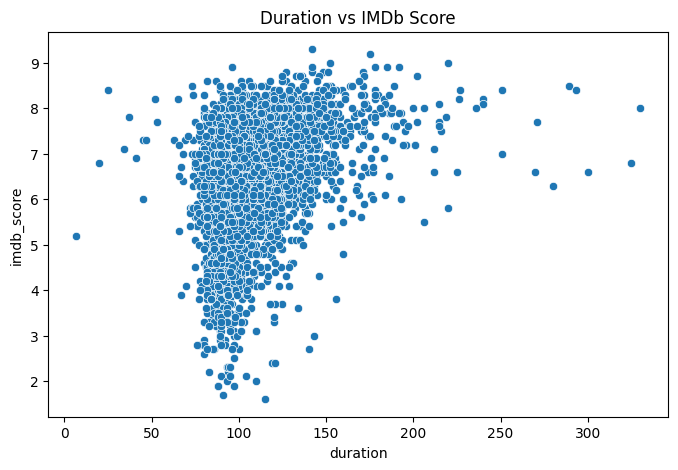

In [11]:
# Duration vs IMDb Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='duration', y='imdb_score')
plt.title("Duration vs IMDb Score")
plt.show()


In [12]:
# Genre → One-hot encode
genre_dummies = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df.drop('genres', axis=1), genre_dummies], axis=1)


In [13]:
# Plot Keywords → top 20 only
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=20, token_pattern=r'(?u)\b\w+\b')
keywords_matrix = vectorizer.fit_transform(df['plot_keywords'].fillna(''))

keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df.drop('plot_keywords', axis=1), keywords_df], axis=1)


In [14]:
# Encode categorical (actors/director)
for col in ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [15]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create encoders
actor_encoder = LabelEncoder()
director_encoder = LabelEncoder()

# Combine all actor names (across all 3 columns)
all_actors = pd.concat([
    df['actor_1_name'],
    df['actor_2_name'],
    df['actor_3_name']
], ignore_index=True).dropna().unique()

# Fit encoders
actor_encoder.fit(all_actors)
director_encoder.fit(df['director_name'].dropna().unique())


LabelEncoder()

In [16]:
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For SVR: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [18]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)


In [19]:
def evaluate(y_true, y_pred, model_name):
    print(f"📊 {model_name} Performance")
    print("R² Score :", round(r2_score(y_true, y_pred), 3))
    print("MAE      :", round(mean_absolute_error(y_true, y_pred), 3))
    print("RMSE     :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))
evaluate(y_test, y_pred_tree, "Regression Tree")
evaluate(y_test, y_pred_svr, "SVR")



📊 Regression Tree Performance
R² Score : -0.65
MAE      : 1.016
RMSE     : 1.383
📊 SVR Performance
R² Score : 0.246
MAE      : 0.705
RMSE     : 0.934


In [20]:
# Let's say Regression Tree performed better
joblib.dump(tree_model, "best_imdb_model.pkl")

# Save scaler only if using SVR
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [21]:
# Save the column names used during training
feature_columns = X.columns.tolist()


In [22]:
import joblib

joblib.dump(svr_model, 'best_imdb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
# Save encoders for use in Streamlit app
joblib.dump(actor_encoder, "actor_encoder.pkl")
joblib.dump(director_encoder, "director_encoder.pkl")


['director_encoder.pkl']

In [23]:
from google.colab import files

files.download('best_imdb_model.pkl')
files.download('scaler.pkl')
files.download("actor_encoder.pkl")
files.download("director_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>